## Exercice 1

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)

In [3]:
print(data.frame.head())
print(data.target.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
X, y = data.data, data.target
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

In [5]:
model = XGBClassifier(
        n_estimators=1000,      
        learning_rate=0.2,  
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective="binary:logistic",
        eval_metric="logloss" ,
        early_stopping_rounds=20, 
    )

model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=True
    )

[0]	validation_0-logloss:0.50961	validation_1-logloss:0.51150
[1]	validation_0-logloss:0.40829	validation_1-logloss:0.42025
[2]	validation_0-logloss:0.33055	validation_1-logloss:0.34401
[3]	validation_0-logloss:0.27535	validation_1-logloss:0.29832
[4]	validation_0-logloss:0.23032	validation_1-logloss:0.25687
[5]	validation_0-logloss:0.19349	validation_1-logloss:0.22421
[6]	validation_0-logloss:0.16502	validation_1-logloss:0.20348
[7]	validation_0-logloss:0.14311	validation_1-logloss:0.18739
[8]	validation_0-logloss:0.12379	validation_1-logloss:0.17098
[9]	validation_0-logloss:0.10715	validation_1-logloss:0.15804
[10]	validation_0-logloss:0.09399	validation_1-logloss:0.14842
[11]	validation_0-logloss:0.08313	validation_1-logloss:0.14121
[12]	validation_0-logloss:0.07370	validation_1-logloss:0.13458
[13]	validation_0-logloss:0.06646	validation_1-logloss:0.13366
[14]	validation_0-logloss:0.06019	validation_1-logloss:0.13014
[15]	validation_0-logloss:0.05508	validation_1-logloss:0.12850
[1

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,'logloss'


In [6]:
preds = model.predict(X_test)
print("Accuracy test:", accuracy_score(y_test, preds))

Accuracy test: 0.956140350877193


In [7]:
model = XGBClassifier(
        n_estimators=1000,      
        learning_rate=0.2,  
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective="binary:logitraw",
        eval_metric=["auc", "error"] ,
        early_stopping_rounds=20, 
    )

model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=True
    )

[0]	validation_0-auc:0.98259	validation_0-error:0.04121	validation_1-auc:0.97110	validation_1-error:0.05495
[1]	validation_0-auc:0.98986	validation_0-error:0.03022	validation_1-auc:0.97704	validation_1-error:0.04396
[2]	validation_0-auc:0.99842	validation_0-error:0.01923	validation_1-auc:0.97910	validation_1-error:0.03297
[3]	validation_0-auc:0.99848	validation_0-error:0.01648	validation_1-auc:0.97755	validation_1-error:0.04396
[4]	validation_0-auc:0.99918	validation_0-error:0.01923	validation_1-auc:0.97833	validation_1-error:0.04396
[5]	validation_0-auc:0.99921	validation_0-error:0.01648	validation_1-auc:0.97833	validation_1-error:0.04396
[6]	validation_0-auc:0.99948	validation_0-error:0.01099	validation_1-auc:0.98762	validation_1-error:0.04396
[7]	validation_0-auc:0.99955	validation_0-error:0.01099	validation_1-auc:0.98607	validation_1-error:0.04396
[8]	validation_0-auc:0.99958	validation_0-error:0.01099	validation_1-auc:0.98607	validation_1-error:0.04396
[9]	validation_0-auc:0.99971

,objective,'binary:logitraw'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,"['auc', 'error']"


In [8]:
preds = model.predict(X_test)
print("Accuracy test:", accuracy_score(y_test, preds))

Accuracy test: 0.956140350877193


In [9]:
model = XGBClassifier(
        n_estimators=1000,      
        learning_rate=0.2,  
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective="rank:pairwise",
        eval_metric=["auc"] ,
        early_stopping_rounds=20, 
    )

model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=True
    )

[0]	validation_0-auc:0.94330	validation_1-auc:0.94505
[1]	validation_0-auc:0.98250	validation_1-auc:0.97420
[2]	validation_0-auc:0.98113	validation_1-auc:0.96543
[3]	validation_0-auc:0.98479	validation_1-auc:0.96646
[4]	validation_0-auc:0.98367	validation_1-auc:0.96698
[5]	validation_0-auc:0.98587	validation_1-auc:0.96878
[6]	validation_0-auc:0.98507	validation_1-auc:0.96646
[7]	validation_0-auc:0.98536	validation_1-auc:0.97601
[8]	validation_0-auc:0.98481	validation_1-auc:0.98168
[9]	validation_0-auc:0.98439	validation_1-auc:0.98039
[10]	validation_0-auc:0.98452	validation_1-auc:0.98142
[11]	validation_0-auc:0.98449	validation_1-auc:0.98194
[12]	validation_0-auc:0.98476	validation_1-auc:0.98194
[13]	validation_0-auc:0.98446	validation_1-auc:0.98246
[14]	validation_0-auc:0.98446	validation_1-auc:0.98246
[15]	validation_0-auc:0.98426	validation_1-auc:0.98349
[16]	validation_0-auc:0.98417	validation_1-auc:0.98349
[17]	validation_0-auc:0.98407	validation_1-auc:0.98452
[18]	validation_0-au

,objective,'rank:pairwise'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,['auc']


In [10]:
preds = model.predict(X_test)
print("Accuracy test:", accuracy_score(y_test, preds))

Accuracy test: 0.6491228070175439


## Exercice 2

In [11]:
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# print(housing.DESCR)
print(housing.frame.head())
print(housing.target.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [12]:
model = XGBRegressor(
        n_estimators=1000,      
        learning_rate=0.2,  
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        objective="reg:squarederror",
        eval_metric=["rmse", "mae"] ,
        early_stopping_rounds=20, 
    )

model.fit(
        X_train,
        y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=True
    )

[0]	validation_0-rmse:0.39690	validation_0-mae:0.38278	validation_1-rmse:0.40499	validation_1-mae:0.38850
[1]	validation_0-rmse:0.32783	validation_0-mae:0.31412	validation_1-rmse:0.34449	validation_1-mae:0.32620
[2]	validation_0-rmse:0.26982	validation_0-mae:0.25665	validation_1-rmse:0.29107	validation_1-mae:0.26950
[3]	validation_0-rmse:0.22337	validation_0-mae:0.20947	validation_1-rmse:0.25603	validation_1-mae:0.22708
[4]	validation_0-rmse:0.18668	validation_0-mae:0.17153	validation_1-rmse:0.22603	validation_1-mae:0.19063
[5]	validation_0-rmse:0.15863	validation_0-mae:0.14152	validation_1-rmse:0.20762	validation_1-mae:0.16381
[6]	validation_0-rmse:0.13746	validation_0-mae:0.11766	validation_1-rmse:0.19697	validation_1-mae:0.14300
[7]	validation_0-rmse:0.12028	validation_0-mae:0.09851	validation_1-rmse:0.18837	validation_1-mae:0.12734
[8]	validation_0-rmse:0.10608	validation_0-mae:0.08209	validation_1-rmse:0.18438	validation_1-mae:0.11302
[9]	validation_0-rmse:0.09256	validation_0-mae

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,"['rmse', 'mae']"


In [13]:
# Récupération des résultats d'évaluation
results = model.evals_result()

# Extraction des métriques
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']
train_mae = results['validation_0']['mae']
val_mae = results['validation_1']['mae']

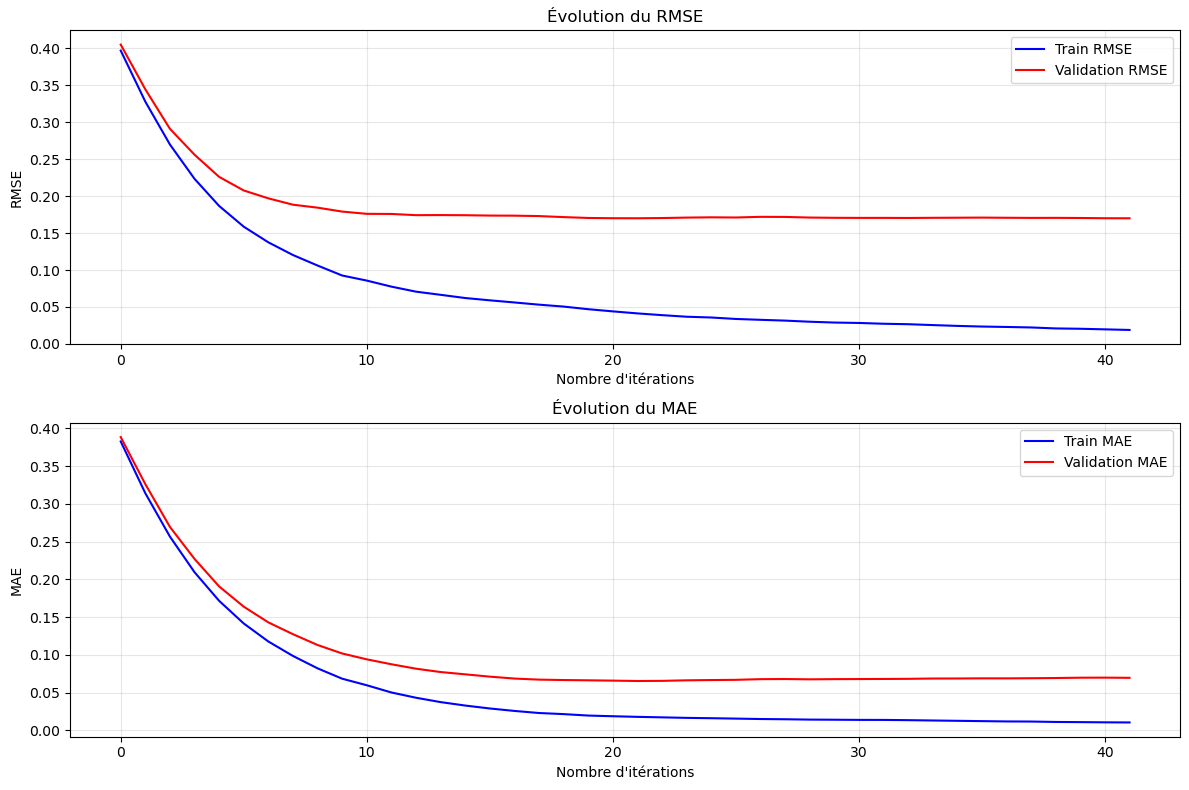

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# RMSE
plt.subplot(2, 1, 1)
plt.plot(train_rmse, label='Train RMSE', color='blue')
plt.plot(val_rmse, label='Validation RMSE', color='red')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('RMSE')
plt.title('Évolution du RMSE')
plt.legend()
plt.grid(True, alpha=0.3)

# MAE
plt.subplot(2, 1, 2)
plt.plot(train_mae, label='Train MAE', color='blue')
plt.plot(val_mae, label='Validation MAE', color='red')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('MAE')
plt.title('Évolution du MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Exercice 3

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("archit9406/bike-sharing")

print("Path to dataset files:", path)

/opt/miniconda3/envs/but3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/davidlaiymani/.cache/kagglehub/datasets/archit9406/bike-sharing/versions/1


In [22]:
import os
import pandas as pd

csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("Aucun fichier CSV trouvé dans le dossier téléchargé.")

# On charge le premier CSV trouvé (souvent 'day.csv')
file_path = os.path.join(path, csv_files[0])
df = pd.read_csv(file_path)

# --- 5. Vérification du chargement ---
print(f"\nFichier chargé : {csv_files[0]}")
print("Dimensions :", df.shape)
print(df.head())
print(df.columns)


Fichier chargé : hour.csv
Dimensions : (17379, 17)
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
Index(['instant', 'dteday', 'season', 'yr', 'mn

In [23]:
y = df["cnt"].copy()      # on copie la colonne
df = df.drop(columns=["cnt"])

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [ ]:
X = df

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: cnt
Non-Null Count  Dtype
--------------  -----
17379 non-null  int64
dtypes: int64(1)
memory usage: 135.9 KB


In [28]:
print(y.head())
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.